<div style="text-align: center; font-family: 'Times New Roman', Times, serif; background-color: #f5f5f5; padding: 20px; border-radius: 10px; box-shadow: 0 0 10px rgba(0, 0, 0, 0.1);">

  <h1 style="color: #333; text-decoration: underline;">Machine Learning</h1>
  <div style="font-style: italic; margin-top: 10px; color: #555;">Notebook Author: Shahzaib Yaqoob</div>
  <div style="font-weight: bold; margin-top: 5px; color: #555;">Gmail: shahzaibmalik4488@gmail.com</div>
  <!-- Social Media Links -->
  <div style="margin-top: 20px;">
    <a href="https://github.com/mshahzaib4/mshahzaib4/blob/main/README.md" style="color: #555; margin-right: 20px;">GitHub</a>
    <a href="https://www.linkedin.com/in/shahzaib-malik-8b16202b1/" style="color: #555;">LinkedIn</a>
  </div>

  <!-- Additional Styling -->
  <style>
    /* Add your additional styling here */
    a:hover {
      text-decoration: underline;
    }
  </style>

  <!-- Footer -->
  <div style="margin-top: 20px; color: #555;">
    &copy; 2023 Shahzaib Yaqoob. All rights reserved.
  </div>

  <!-- Portfolio Project Section -->
  <h2 style="margin-top: 30px; color: #333;">Portfolio Project: Binary Classification with a Bank Churn</h2>
  <p style="color: #777;">This Jupyter notebook script is an integral part of the enlightening "Data_Science in 6_months" curriculum crafted by the esteemed Dr. Aammar. The primary emphasis lies in assimilating knowledge about creating a sophisticated binary classification model adept at predicting bank churn. Aspiring data scientists are encouraged to absorb the insights and advance their skills.</p>

  <!-- Sir's YouTube Channel -->
  <div style="margin-top: 20px;">
    <p style="color: #555;">For additional learning resources, Sir Aammar maintains a free educational YouTube channel. Explore and enhance your skills at </br> <a href="https://www.youtube.com/@Codanics" style="color: #0077cc;" target="_blank">Sir Aammar's YouTube Channel</a>.</p>
  </div>
</div>


# Introduction



## About the Data

*This dataset consists of nearly 3000 Amazon customer reviews (input text), star ratings, date of review, variant, and feedback of various Amazon Alexa products like Alexa Echo, Echo dots, Alexa Firesticks, etc. The purpose is to facilitate learning how to train machines for sentiment analysis.*

### What you can do with this Data?

You can utilize this data for several purposes:
- *Analyze Amazon’s Alexa product reviews to gain insights into consumer sentiments.*
- *Assist with machine learning models by providing labeled data for sentiment analysis.*
- *Train machine learning models for sentiment analysis and analyze customer reviews to determine the proportion of positive and negative feedback.*

### Source
Extracted from Amazon's website

### Inspiration
This data is made available to the world's largest data science community. Consider the following questions for exploration:
- *What are the prevalent sentiments expressed in Amazon Alexa product reviews?*
- *How do different variants of Alexa products compare in terms of customer satisfaction?*
- *Can machine learning models accurately predict sentiment based on review text and star ratings?*


----

In [1]:
# Data manipulation and processing
import numpy as np
import pandas as pd

# Data Exploration

In [ ]:

alexa_dataset = pd.read_table("/kaggle/input/amazon-alexa-reviews/amazon_alexa.tsv")

#alexa_dataset = pd.read_csv(r"Data set\amazon_alexa.tsv", delimiter = '\t', quoting = 3)


In [ ]:
alexa_dataset.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [ ]:
print(f"The dataset is relatively large, with {alexa_dataset.shape[0]} observations")

print(f"There are {alexa_dataset.shape[1]} features (columns) in the dataset.")

The dataset is relatively large, with 3150 observations
There are 5 features (columns) in the dataset.


In [ ]:
alexa_dataset.isnull().sum()


rating              0
date                0
variation           0
verified_reviews    1
feedback            0
dtype: int64

In [ ]:
alexa_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3149 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [ ]:
alexa_dataset.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


In [ ]:
print(f"Variation value count: \n{alexa_dataset['variation'].value_counts()}")


Variation value count: 
variation
Black  Dot                      516
Charcoal Fabric                 430
Configuration: Fire TV Stick    350
Black  Plus                     270
Black  Show                     265
Black                           261
Black  Spot                     241
White  Dot                      184
Heather Gray Fabric             157
White  Spot                     109
White                            91
Sandstone Fabric                 90
White  Show                      85
White  Plus                      78
Oak Finish                       14
Walnut Finish                     9
Name: count, dtype: int64


# Visualize  data

In [ ]:
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

C:\Users\laptop zone\AppData\Local\Temp\ipykernel_28128\4049998533.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  alexa_dataset['date'] = pd.to_datetime(alexa_dataset['date'])


C:\Users\laptop zone\AppData\Local\Temp\ipykernel_28128\4049998533.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='variation', data=alexa_dataset, palette='viridis', ax=axs[1, 0])


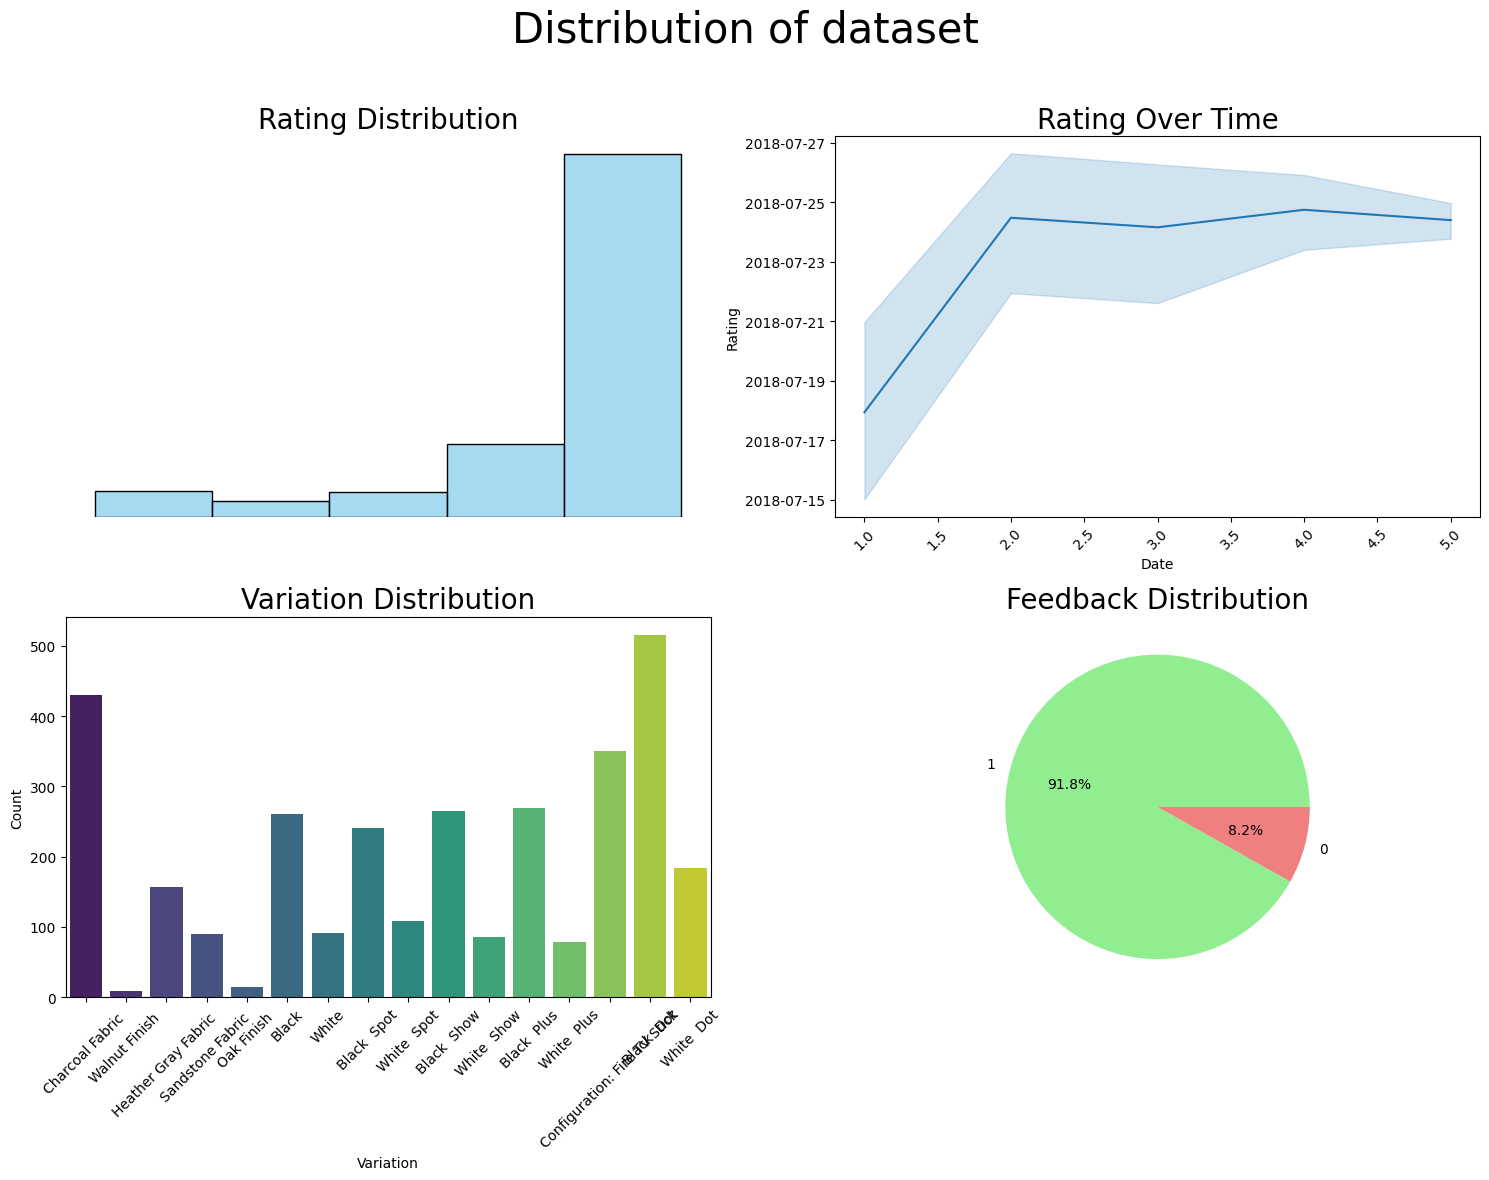

In [ ]:


fig, axs = plt.subplots(2, 2, figsize=(15, 12))
plt.suptitle("Distribution of dataset\n",size=30)

sns.histplot(alexa_dataset['rating'], bins=5, kde=False, color='skyblue', edgecolor='black', ax=axs[0, 0])
axs[0, 0].set_xlabel('Rating')
axs[0, 0].set_ylabel('Frequency')
axs[0, 0].set_title('Rating Distribution',size=20)
axs[0, 0].axis("off")
alexa_dataset['date'] = pd.to_datetime(alexa_dataset['date'])
sns.lineplot(y='date', x='rating', data=alexa_dataset, ax=axs[0, 1])
axs[0, 1].set_xlabel('Date')
axs[0, 1].set_ylabel('Rating')
axs[0, 1].set_title('Rating Over Time',size=20)
axs[0, 1].tick_params(axis='x', rotation=45)

sns.countplot(x='variation', data=alexa_dataset, palette='viridis', ax=axs[1, 0])
axs[1, 0].set_xlabel('Variation')
axs[1, 0].set_ylabel('Count')
axs[1, 0].set_title('Variation Distribution',size=20)
axs[1, 0].tick_params(axis='x', rotation=45)

alexa_dataset['feedback'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightgreen', 'lightcoral'], ax=axs[1, 1])
axs[1, 1].set_title('Feedback Distribution',size=20)
axs[1, 1].set_ylabel('')

plt.tight_layout()

plt.show()



Text(0.5, 1.0, 'Word Cloud of Verified Reviews')

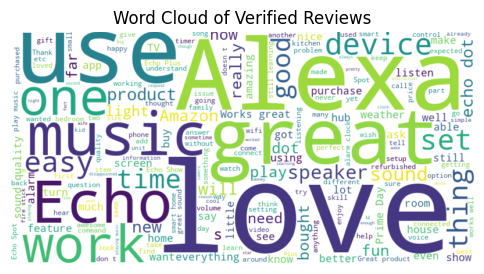

In [ ]:
plt.figure(figsize=(6,18))

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(alexa_dataset['verified_reviews'].dropna()))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Verified Reviews')

# Data Preparation

In [ ]:
# Text processing and NLP
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
nltk.download('stopwords')
STOPWORDS = set(stopwords.words('english'))


# Machine learning models and utilities
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

import re

[nltk_data] Downloading package stopwords to C:\Users\laptop
[nltk_data]     zone\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
alexa_dataset['verified_reviews'].dropna(inplace=True)

In [ ]:
corpus = []

for review in alexa_dataset['verified_reviews']:
    words = re.sub('[^a-zA-Z]', ' ', str(review)).lower().split()
    stemmed_words = [PorterStemmer().stem(word) for word in words if word not in STOPWORDS]
    
    processed_review = ' '.join(stemmed_words)
    corpus.append(processed_review)

In [ ]:

#Storing independent and dependent variables in X and y
X = CountVectorizer(max_features = 2500).fit_transform(corpus).toarray()
y = alexa_dataset['feedback'].values

In [ ]:
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

X shape: (3150, 2500)
y shape: (3150,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 15)

print(f"X train: {X_train.shape}")
print(f"y train: {y_train.shape}")
print(f"X test: {X_test.shape}")
print(f"y test: {y_test.shape}")

X train: (2520, 2500)
y train: (2520,)
X test: (630, 2500)
y test: (630,)


In [ ]:
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model Building

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Trees": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting Machines (GBM)": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Support Vector Machines (SVM)": SVC(),
    "K-Nearest Neighbors (KNN)": KNeighborsClassifier()
}


In [ ]:
model_accuracy={}
best_accuracy=0
for name, model in models.items():
    model.fit(X_train, y_train)
    print(f"{name} Training Accuracy:", model.score(X_train, y_train))
    print(f"{name} Testing Accuracy:", model.score(X_test, y_test))
    print("---------------------------------------------------------")

    if model.score(X_test, y_test) > best_accuracy:
        best_model = model
        best_name=name
        best_accuracy = model.score(X_test, y_test)

print("Best Model:", best_model)
print("Best Testing Accuracy:", best_accuracy)

Logistic Regression Training Accuracy: 0.9646825396825397
Logistic Regression Testing Accuracy: 0.9365079365079365
---------------------------------------------------------
Decision Trees Training Accuracy: 0.9944444444444445
Decision Trees Testing Accuracy: 0.9206349206349206
---------------------------------------------------------
Random Forest Training Accuracy: 0.9944444444444445
Random Forest Testing Accuracy: 0.9380952380952381
---------------------------------------------------------
Gradient Boosting Machines (GBM) Training Accuracy: 0.9547619047619048
Gradient Boosting Machines (GBM) Testing Accuracy: 0.926984126984127
---------------------------------------------------------
AdaBoost Training Accuracy: 0.9476190476190476
AdaBoost Testing Accuracy: 0.9365079365079365
---------------------------------------------------------
Support Vector Machines (SVM) Training Accuracy: 0.971031746031746
Support Vector Machines (SVM) Testing Accuracy: 0.9238095238095239
--------------------

# Confusion Matrix

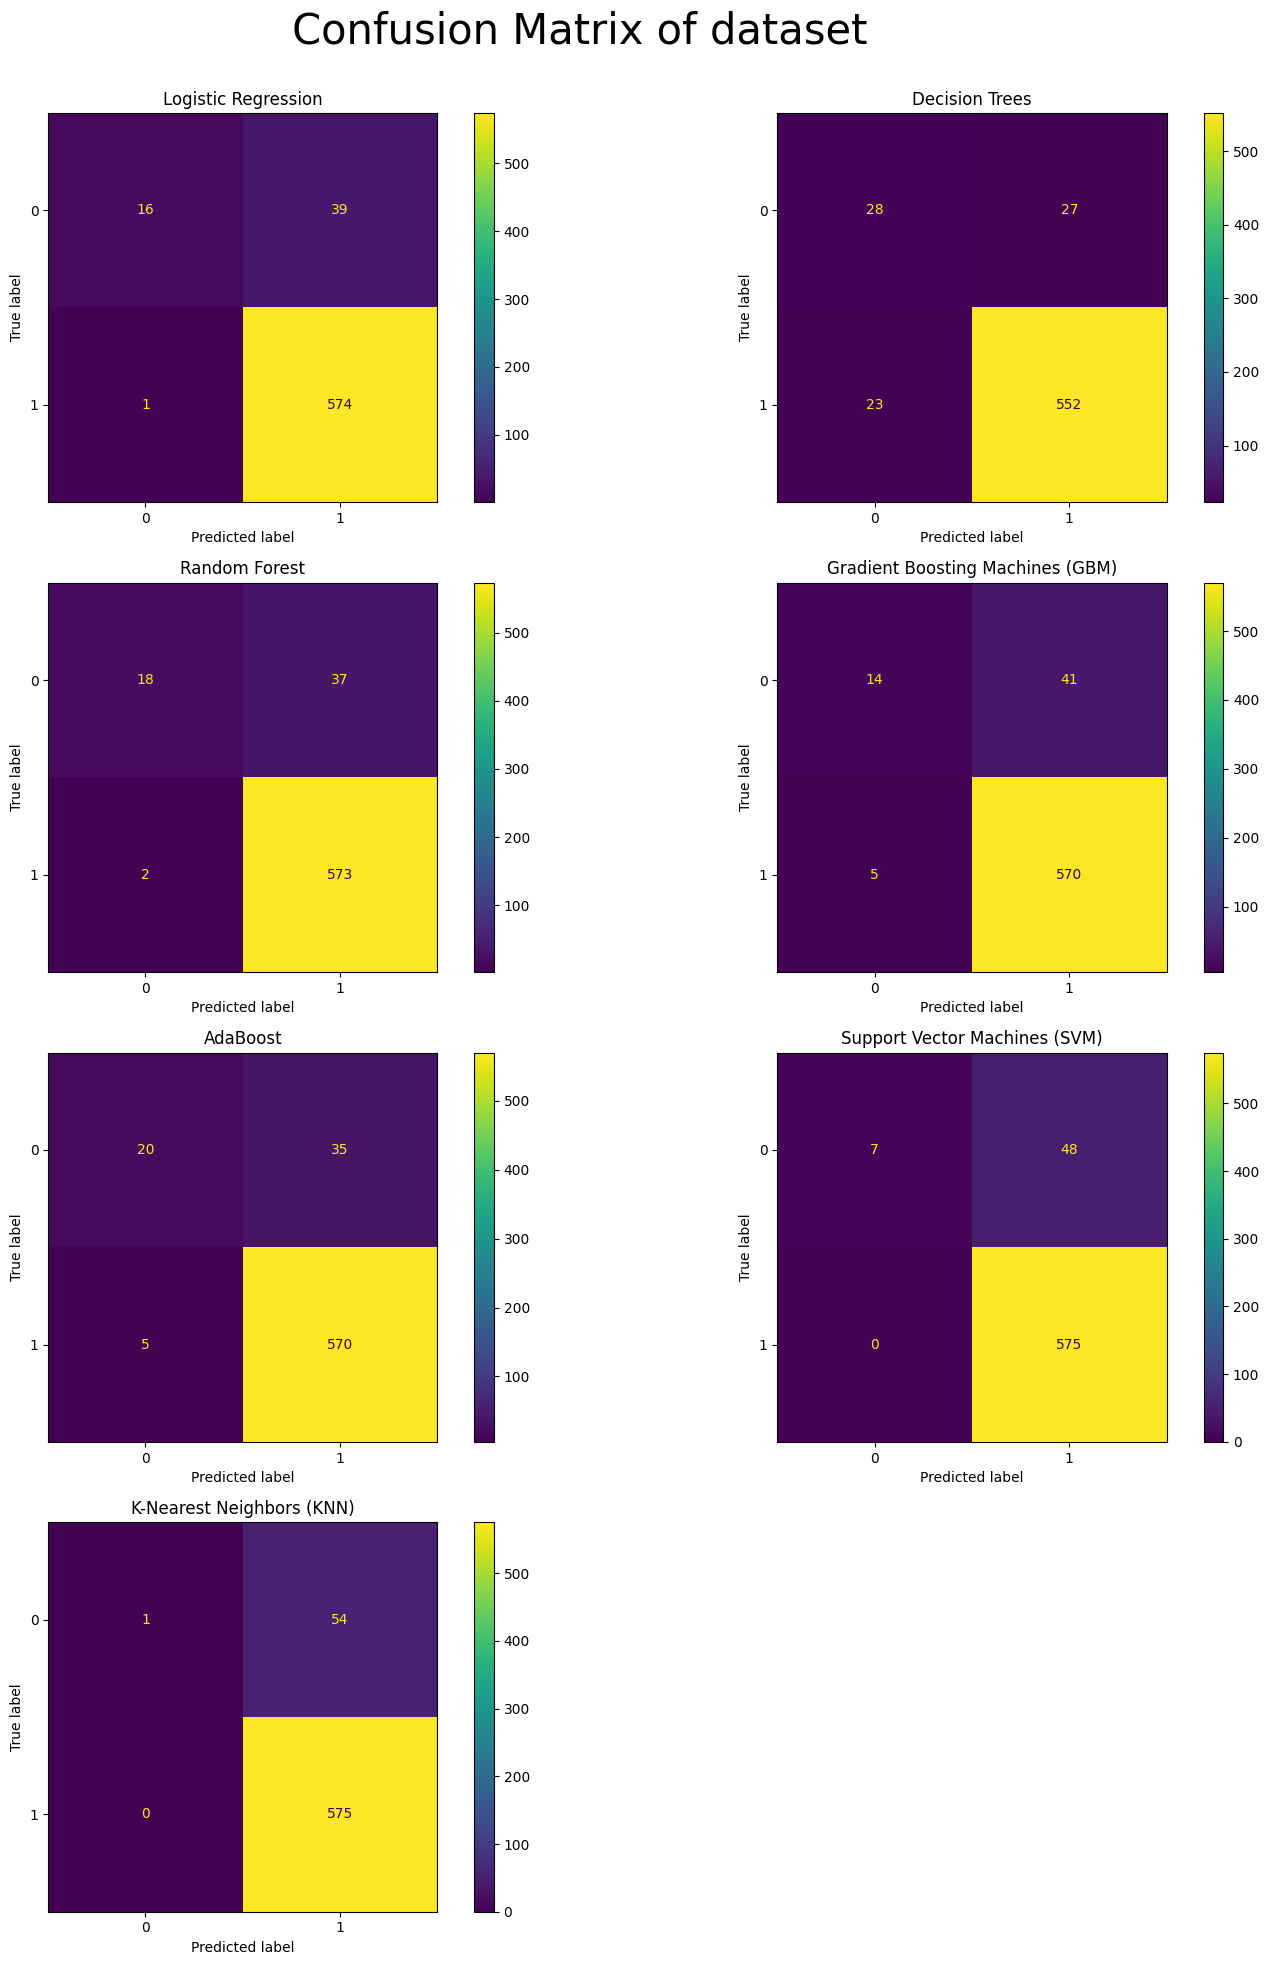

In [ ]:
fig, axes = plt.subplots(4, 2, figsize=(15, 20))
plt.suptitle("Confusion Matrix of dataset\n", size=30)

for idx, (name, model) in enumerate(models.items()):
    row = idx // 2
    col = idx % 2
    
    y_preds = model.predict(X_test)  
    cm = confusion_matrix(y_test, y_preds)
    
    cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    cm_display.plot(ax=axes[row, col])
    axes[row, col].set_title(f"{name}")

fig.delaxes(axes[3, 1])
plt.tight_layout()
plt.show()


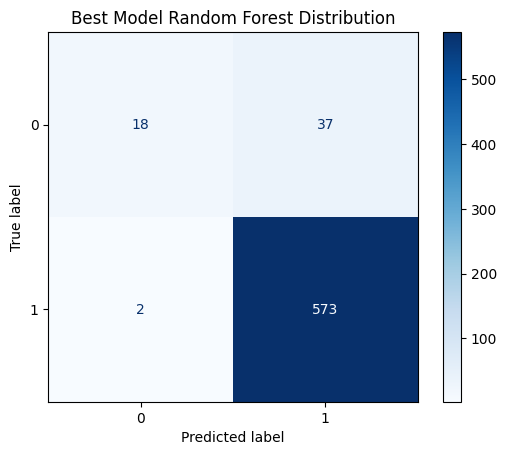

In [ ]:

y_preds = best_model.predict(X_test)  
cm = confusion_matrix(y_test, y_preds)    
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
cm_display.plot(cmap=plt.cm.Blues)
plt.title(f"Best Model {best_name} Distribution")
plt.show()

# Save Model

In [ ]:
# Miscellaneous
import pickle

In [ ]:
pickle.dump(best_model, open('Save Model/Model.pkl', 'wb'))


# **Data Overview**

- **Dataset Size**: The dataset comprises 3150 observations with features such as 'rating', 'date', 'variation', 'verified_reviews', and 'feedback'. 
- **Missing Values**: One missing value is observed in the 'verified_reviews' feature.

### **Ratings Analysis**
- **Average Rating**: The dataset's average rating stands at 4.46 out of 5.
- **Rating Range**: Ratings span from 1 to 5.
- **Percentile Analysis**: The 75th percentile of ratings is 5.

### **Feedback Insights**
- **Average Feedback Score**: Feedback score averages at 0.92, indicating predominantly positive responses.

### **Variation Counts**
- The dataset includes a breakdown of counts for different variations.

### **Dataset Shape**
- **Training Dataset**: Comprises 2520 samples, each with 2500 features.
- **Training Labels**: The training labels form an array with a shape of (2520,).
- **Testing Dataset**: Consists of 630 samples, each with 2500 features.
- **Testing Labels**: The testing labels form an array with a shape of (630,).

## **Model Selection in ML**
  `1`. Logistic Regression

  `2`. Decision Trees

  `3`. Random Forest

  `4`. Gradient Boosting Machines (GBM)

  `5`. AdaBoost

  `6`. Support Vector Machines (SVM)
  
  `7`. K-Nearest Neighbors (KNN)
  
The Random Forest model emerged as the top performer, boasting a testing accuracy of 93.81%.

### **Saving Best Model**
- The Random Forest model was selected as the best-performing model and saved for future use.
